# Chapter 10: Introduction to Artificial Neural Networks using Keras

# 1. Perceptron

- The Perceptron is one of the simplest ANN architectures.
- It is composed of a single layer of threshold logic unit (TLUs.)
- TLU computes a weighted sum of its inputs, then applies a step function to that sum and outputs the result.
- When all neurons in a layer are connected to every neuron in the previous layer, it is called a fully connected layer.
- The fully connected layer is computed this way
$h_{W,b}(X) = \phi(XW + b)$  
- The Percetron is fed one training instance at a time and for each instance it makes its prediction. 
- For every output neuron that produced a wrong prediction, it reinforces the connection weights from the inputs that would have contributed to the correct prediction.
- The decision boundary of each output neuron is linear so Perceptrons are incapable of learning complex patterns. 

# 2. Backpropagation

- It is Gradient Descent using an efficient technique for computing the gradients automatically in just two passes through the network (one forward, one backward).
- Backpropagation algorithm is able to compute the gradient of the network's error with regard to every single model parameter.
- This means that it can find out how each connection weight and each bias term should be tweaked in order to reduce the error.
- Once it has these gradients, it just performs a regular Gradient Descent step and the whole process is repeated until the network converges to the solution.

## 2.1 Algorithm

- Handles one mini-batch at a time and goes through the full training set multiple times. Each pass is called an epoch
- Each mini-batch is passed to the network's input layer, which sends it to the first hidden layer
- The algorithm then computes the output of all the neurons in this layer (for every instance in the mini-batch).
- The result is passed on to the next layer, its outpuet is computed and passed to the next layer and so on until we get the output of the last layer (output layer)
- The algorithm measures the network's output error (i.e uses loss function that compares the desired output and actual output of network and returns some measure of error)
- Algorithm compares how much each output connection contributed to the error using the help of chain rule, which makes this step fast.
- Algorithm then measures how much of these error contributions came from each connection in the layer below, again using chain rule until it reaches the input layer.
- This reverse pass efficiently measures the error gradient across all the connection weights in the network by propagating the error gradient backward through the network.
- Finally, the algorithm performs a Gradient Descent step to tweak all the connection weights in the network, using the gradients it just computed.

In summary, for each training instance, the backpropagation algorithm first makes a prediction (forward pass) and measures the error, then goes through each layer in reverse to measure the error contribution from each connection. Then it finally tweaks the connection weights to reduce the error.

# 3. Activation Functions

![figure10.8](images/figure10.8.png)

- If we chain several linear transformations, all we get is linear transformation.    
Example: $f(x) = 2x + 3$ and $g(x) = 5x - 1$.     
$f(g(x)) = 2(5x - 1) + 3 = 10x + 1$      

- If we don't have some nonlinearity between layers, then even a deep stack of layers is equivalent to a single layer and we can't solve very complex problems.

# 4. Regression MLP

- If we are just predicting a single value, we will only need a single output neuron
- Loss function to use during training is typically the mean squared error (MSE) but if we have a lot of outliers in the training set, we can use mean absolute error (MAE) or Huber loss, which is a combination of both.

![table10.1](images/_table10.1.png)

# 5. Classification MLP

- For **binary classification problem**, we only need a single output neuron using the logistic activate function (output will be a number between 0 and 1 which we can interpret as the probability of the positive class)
- For **multilabel binary classification tasks**, example: spam or ham and simultaneously predicts whether it is an urgent or nonurgent email, we need two output neurons both using the logistic activation function. The first would output the probability that the mail is spam and second would output the probability that it is urgent.
- For **multiclass classification tasks**, we will have one output neuron per class and use softmax activation function for the output layer.

![table10.2](images/_table10.2.png)

# 6. Implementing MLPs with Keras

## 6.1 Preparation

- Keras is a high-level deep learning API that allows us to easily build, train, evaluate and execute all sorts of neural networks

In [26]:
import tensorflow as tf 
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model
import numpy as np 

print(tf.__version__)
print(keras.__version__)

2.8.0
2.8.0


- In fashion MNIST, we have 70,000 grayscale images of 28 x 28 pixels each with 10 classes.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train_full.shape

(60000, 28, 28)

- We are going to split the training set into train set and validation set
- Since we are going to train the neural network using Gradient Descent, we must scale the input features.
- We will scale the pixel intensities down to the 0-1 range by dividing them by 255.0

In [4]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.0

In [5]:
class_names = ["T-shirt/top", "Trouser", 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
# Check the label of first instance
class_names[y_train[0]]

'Coat'

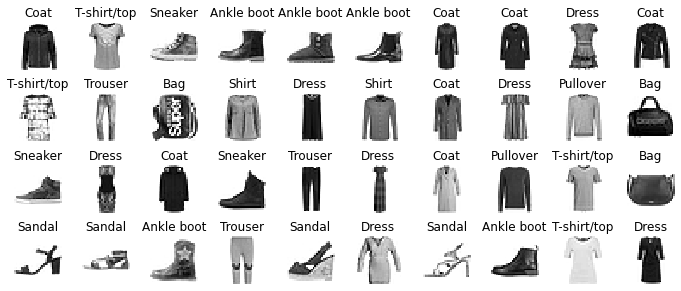

In [8]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## 6.2 Creating Model using Sequential API

In [9]:
# This is the simplest kind of Keras model for neural networks that are just composed of a single stack of layers connected sequentially.
model = keras.models.Sequential()

# Build first layer and add it to the model.
# It is a flatten layer whose role is to convert each input image into a 1D array. (reshape(-1, 1))
model.add(keras.layers.Flatten(input_shape=[28, 28]))

# Add a dense hidden layer with 300 neurons. Use ReLU activation function
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))

# The last layer we add a Dense output layer with 10 neurons (one per class), using the softmax activation function (because the classes are exclusive)
model.add(keras.layers.Dense(10, activation="softmax"))

Alternatively, we can pass a list of layers when creating the `Sequential` model

In [10]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


- The first hidden layer has 784x300 connection weights + 300 bias terms, which adds up to 235500 parameters

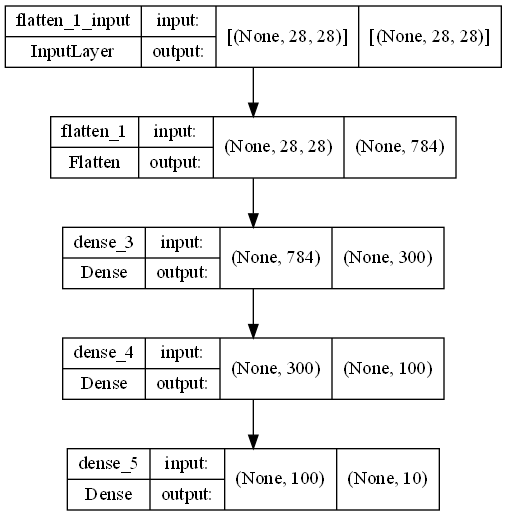

In [13]:
#conda install graphviz
#conda install pydot
#conda install pydotplus
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

- All the parameters of a layer can be accessed using its `get_weights()` and `set_weights()` methods.

In [14]:
hidden1 = model.layers[1]
print(hidden1.name)

dense_3


In [15]:
weights, biases = hidden1.get_weights()

In [16]:
weights

array([[-0.03550194,  0.026763  , -0.05496952, ...,  0.06234607,
        -0.01958454, -0.07247707],
       [ 0.05312347, -0.06168449, -0.00690103, ..., -0.00810606,
         0.04796738,  0.07112816],
       [ 0.07343674,  0.00355121,  0.01129284, ...,  0.01459645,
         0.03866401,  0.00992532],
       ...,
       [ 0.07023481,  0.04740307, -0.05007914, ..., -0.03447373,
        -0.03305513, -0.00741641],
       [ 0.07079388,  0.04774422,  0.04132418, ...,  0.06253916,
        -0.06233387, -0.01359921],
       [-0.06346244,  0.04384978, -0.06936462, ..., -0.0673992 ,
         0.03135884, -0.03409648]], dtype=float32)

In [17]:
weights.shape

(784, 300)

First input connection to each of the 300 neurons in hidden layer.

In [18]:
weights[0]

array([-0.03550194,  0.026763  , -0.05496952, -0.0396114 ,  0.00171014,
       -0.02661934, -0.04328419,  0.02588104,  0.01886033, -0.04168353,
        0.06313936, -0.01816562,  0.034371  ,  0.02634424,  0.01544217,
        0.03367422, -0.05955818, -0.06337114,  0.06066568,  0.02936454,
        0.03856376,  0.02425412, -0.01198527, -0.05954003,  0.06618066,
        0.07400754,  0.021465  , -0.06669442,  0.03395548, -0.03818245,
        0.02867067,  0.0180715 ,  0.04577805,  0.04957814, -0.03635976,
       -0.00797799, -0.05280275,  0.02550439, -0.00486012,  0.01385266,
       -0.07294268, -0.05895633,  0.00421606,  0.00224176,  0.04102567,
       -0.03788963, -0.04114794,  0.00877522, -0.04323959, -0.03931945,
       -0.03294398,  0.06915732,  0.00067221,  0.05712625, -0.01060534,
       -0.01557034, -0.03405895,  0.06227823, -0.00563996, -0.03311468,
        0.05404492, -0.02828035,  0.00419722, -0.05862967,  0.06637879,
       -0.02196395, -0.07389785, -0.00421086,  0.00044861, -0.00

## 6.3 Compiling Model

- Losses: https://keras.io/api/losses/    
- Optimizers: https://keras.io/api/optimizers/     
- Metrics: https://keras.io/api/metrics/   

In [19]:
model.compile(loss="sparse_categorical_crossentropy", 
             optimizer="sgd",
             metrics=["accuracy"])

- Sprase Categorical Crossentropy: because we have sparse labels (for each instance, there is just a target class index from 0 to 9). If we had one target probability per class for each instance, then we need to use `categorical_crossentropy` loss instead. 

- If we are doing binary classification, we would use `sigmoid` (logistic) activation function and use `binary_crossentropy`

## 6.4 Training and Evaluating Model

In [ ]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

In [ ]:
print(history.params)
print(history.history.keys())

{'verbose': 1, 'epochs': 30, 'steps': 1719}
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


- If the training set was very skewed, with some classes being overrepresented and others underrepresented, it would be useful to set the `class_weight` argument
- We can give larger weight to underrepresented classes and lower weight to overrepresented classes.

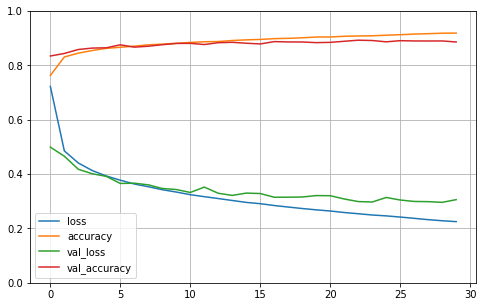

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Both training accuracy and validation accuracy streadily increase during the training while training loss and validation loss decrease. Not sign of overfitting.

The validation loss is still going down so the model has no yet converged. We should continue training.

If not satisfied with model performance, we can go back to tune the hyperparameters one by one in this order:   
- Learning rate
- Optimizer
- Number of layers, number of neurons, activation function for each layer, batch size.



In [ ]:
# Evaluate on test set
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3423 - accuracy: 0.8755


[0.3422611951828003, 0.8755000233650208]

## 6.5 Using model to make predictions

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.98],
       [0.  , 0.  , 0.98, 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
y_pred = np.argmax(model.predict(X_new))
y_pred

21

# 7. Building a regression MLP using Sequential API

- Unlike classification, the output layer has a single neuron since we only want to predict a single value.
- It uses no activation function
- The loss function is the mean squared error.
- Since dataset is quite noisy, we just use a single hidden layer with fewer neurons than before, to avoid overfitting

In [21]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [23]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [25]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 0.9078 - val_loss: 0.5514
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5422 - val_loss: 0.4789
Epoch 3/20
363/363 [==============================] - 2s 4ms/step - loss: 0.5360 - val_loss: 0.4581
Epoch 4/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4806 - val_loss: 0.4405
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4591 - val_loss: 0.4493
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4538 - val_loss: 0.4214
Epoch 7/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4375 - val_loss: 0.4146
Epoch 8/20
363/363 [==============================] - 2s 4ms/step - loss: 0.4337 - val_loss: 0.4118
Epoch 9/20
363/363 [==============================] - 2s 4ms/step - loss: 0.4317 - val_loss: 0.4061
Epoch 10/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4189 - val_loss: 0.3996

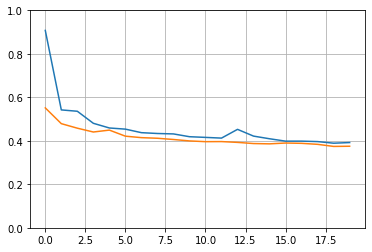

In [27]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [28]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 1s 3ms/step - loss: 0.3919


In [29]:
X_new = X_test[:3]
y_pred = model.predict(X_new)

# 8. Building complex models using functional API

- It is sometimes useful to build neural networks with more complex topologies, or with multiple inputs or outputs.

In [30]:
# Create an input object. This is a specification of the kind of input the model will get.
input_ = keras.layers.Input(shape=X_train.shape[1:])

# Create a dense layer with 30 neurons, using ReLU activation. We tell Keras how it should connect the layers together using function like representation.
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

# Create a concatenate layer that concatenates the input and output of the second hidden layer.
concat = keras.layers.concatenate([input_, hidden2])

# Create output layer with a single neuron and no activation function.
output = keras.layers.Dense(1)(concat)

# Create a Keras Model, specifying which inputs and outputs to use
model = keras.models.Model(inputs=[input_], outputs=[output])

In [32]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_8 (Dense)                (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_9 (Dense)                (None, 30)           930         ['dense_8[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_9[0][0]']            

In [33]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 2.0193 - val_loss: 0.7286
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7378 - val_loss: 0.6639
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6860 - val_loss: 0.6280
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6509 - val_loss: 0.5989
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6248 - val_loss: 0.5786
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6027 - val_loss: 0.5614
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5859 - val_loss: 0.5476
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5718 - val_loss: 0.5350
Epoch 9/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5603 - val_loss: 0.5254
Epoch 10/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5498 - val_loss: 0.5164

# 9. Saving and Restoring a Model

In [35]:
model.save("model/my_keras_model.h5")

In [37]:
model = keras.models.load_model("model/my_keras_model.h5")

If training lasts several hours, we should not only save our model at the end of training, but also save checkpoints at regular intervals during training to avoid losing everything if computer crashes. We can tell the `fit()` method to save checkpoints by using callbacks

## 9.1 Save checkpoints using callbacks

In [38]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])  
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

# save checkpoints
checkpoint_cb = keras.callbacks.ModelCheckpoint("model/my_keras_model.h5")
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 2s 4ms/step - loss: 1.8513
Epoch 2/10
363/363 [==============================] - 1s 4ms/step - loss: 0.7858
Epoch 3/10
363/363 [==============================] - 1s 4ms/step - loss: 0.6827
Epoch 4/10
363/363 [==============================] - 1s 4ms/step - loss: 0.6284
Epoch 5/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5895
Epoch 6/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5574
Epoch 7/10
363/363 [==============================] - 2s 4ms/step - loss: 0.5343
Epoch 8/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5164
Epoch 9/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5030
Epoch 10/10
363/363 [==============================] - 1s 4ms/step - loss: 0.4929


If we use validation set during training, we can set `save_best_only=True` when creating the `ModelCheckpoint`. This way, it will save the model when its performance on the validation set is the best so far. Hence, we do not need to worry about training for too long and overfitting the training.

In [39]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])  
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

checkpoint_cb = keras.callbacks.ModelCheckpoint("model/my_keras_model.h5",
                                                save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("model/my_keras_model.h5") # roll back to the best model

Epoch 1/10
363/363 [==============================] - 2s 5ms/step - loss: 1.7874 - val_loss: 0.7342
Epoch 2/10
363/363 [==============================] - 2s 5ms/step - loss: 0.7680 - val_loss: 0.6618
Epoch 3/10
363/363 [==============================] - 2s 4ms/step - loss: 0.6789 - val_loss: 0.6258
Epoch 4/10
363/363 [==============================] - 2s 5ms/step - loss: 0.6450 - val_loss: 0.5972
Epoch 5/10
363/363 [==============================] - 2s 6ms/step - loss: 0.6183 - val_loss: 0.5751
Epoch 6/10
363/363 [==============================] - 2s 6ms/step - loss: 0.5962 - val_loss: 0.5555
Epoch 7/10
363/363 [==============================] - 2s 6ms/step - loss: 0.5773 - val_loss: 0.5400
Epoch 8/10
363/363 [==============================] - 2s 6ms/step - loss: 0.5613 - val_loss: 0.5259
Epoch 9/10
363/363 [==============================] - 2s 6ms/step - loss: 0.5471 - val_loss: 0.5131
Epoch 10/10
363/363 [==============================] - 2s 6ms/step - loss: 0.5351 - val_loss: 0.5038

We can also use `Early Stopping` callback. It will interrupt training when it measures no progress on the validation set for a number of epochs (defined by the `patience` argument), and it will optionally roll back to the best model. EarlyStopping will keep track of the best weights and restore them for us at the end of the training so there is no need to restore the best model saved.

We can combine both callbacks to save checkpoints and interrupt training early when there is no more progress to save time.

https://keras.io/api/callbacks/

In [40]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])  
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, 
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb]) 


Epoch 1/100
363/363 [==============================] - 2s 5ms/step - loss: 1.9392 - val_loss: 0.9171
Epoch 2/100
363/363 [==============================] - 2s 4ms/step - loss: 0.8627 - val_loss: 0.7158
Epoch 3/100
363/363 [==============================] - 2s 5ms/step - loss: 0.7436 - val_loss: 0.6635
Epoch 4/100
363/363 [==============================] - 2s 5ms/step - loss: 0.6960 - val_loss: 0.6275
Epoch 5/100
363/363 [==============================] - 2s 5ms/step - loss: 0.6617 - val_loss: 0.6004
Epoch 6/100
363/363 [==============================] - 2s 6ms/step - loss: 0.6342 - val_loss: 0.5781
Epoch 7/100
363/363 [==============================] - 2s 5ms/step - loss: 0.6109 - val_loss: 0.5576
Epoch 8/100
363/363 [==============================] - 2s 5ms/step - loss: 0.5909 - val_loss: 0.5404
Epoch 9/100
363/363 [==============================] - 2s 5ms/step - loss: 0.5736 - val_loss: 0.5273
Epoch 10/100
363/363 [==============================] - 2s 5ms/step - loss: 0.5585 - val_lo

# 10. Using TensorBoard for Visualization

Interactive visualization tool that allows us to:
- view the learning curves during training
- compare multiple runs
- visualize computation graph
- analyze training statistics
- view images generated by model
- visualize complex multidimensional data projected down to 3D and automatically clustered

We have to modify the program so that it outputs data to special binary log files
- These binary log files are called event files.
- Each binary data record is called a summary

The TensorBoard server will monitor the log directory and automatically pick up the changes and update the visualizations.

In [41]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

In [42]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

In [43]:
run_logdir = get_run_logdir()

In [44]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])  
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

# Tensorboard()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_train, y_train),
                    callbacks=[tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 3s 6ms/step - loss: 2.0383 - val_loss: 0.9810
Epoch 2/30
363/363 [==============================] - 2s 6ms/step - loss: 0.8437 - val_loss: 0.7598
Epoch 3/30
363/363 [==============================] - 2s 5ms/step - loss: 0.7205 - val_loss: 0.6836
Epoch 4/30
363/363 [==============================] - 2s 5ms/step - loss: 0.6598 - val_loss: 0.6347
Epoch 5/30
363/363 [==============================] - 2s 4ms/step - loss: 0.6180 - val_loss: 0.5993
Epoch 6/30
363/363 [==============================] - 2s 4ms/step - loss: 0.5864 - val_loss: 0.5726
Epoch 7/30
363/363 [==============================] - 1s 4ms/step - loss: 0.5626 - val_loss: 0.5518
Epoch 8/30
363/363 [==============================] - 2s 5ms/step - loss: 0.5443 - val_loss: 0.5347
Epoch 9/30
363/363 [==============================] - 2s 4ms/step - loss: 0.5292 - val_loss: 0.5212
Epoch 10/30
363/363 [==============================] - 2s 4ms/step - loss: 0.5166 - val_loss: 0.5098

Launch the tensorboard server using the code below and view the UI here: http://localhost:6006/#scalars

In [45]:
%load_ext tensorboard 
%tensorboard --logdir=./my_logs --port=6006

![tensorboard](images/tensorboard.png)

# 11. Fine-Tuning Neural Networks Hyperparameters

Best practices regarding tuning neural network hyperparameters:    
Leslie N. Smith - https://arxiv.org/abs/1803.09820

## 11.1 Simplified Way

In [46]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    
    return model

In [47]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

C:\Users\joann\AppData\Local\Temp\ipykernel_9420\1709004121.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [48]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

Epoch 1/100


c:\Users\joann\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


363/363 [==============================] - 2s 5ms/step - loss: 1.4550 - val_loss: 0.6899
Epoch 2/100
363/363 [==============================] - 1s 4ms/step - loss: 0.7141 - val_loss: 0.6232
Epoch 3/100
363/363 [==============================] - 1s 4ms/step - loss: 0.6347 - val_loss: 0.5705
Epoch 4/100
363/363 [==============================] - 1s 4ms/step - loss: 0.5882 - val_loss: 0.5354
Epoch 5/100
363/363 [==============================] - 2s 4ms/step - loss: 0.5552 - val_loss: 0.5133
Epoch 6/100
363/363 [==============================] - 2s 4ms/step - loss: 0.5318 - val_loss: 0.4924
Epoch 7/100
363/363 [==============================] - 2s 5ms/step - loss: 0.5149 - val_loss: 0.4798
Epoch 8/100
363/363 [==============================] - 2s 5ms/step - loss: 0.5009 - val_loss: 0.4755
Epoch 9/100
363/363 [==============================] - 2s 5ms/step - loss: 0.4922 - val_loss: 0.4633
Epoch 10/100
363/363 [==============================] - 2s 5ms/step - loss: 0.4853 - val_loss: 0.4561
E

We can use `GridSearchCV` or `RandomizedSearchCV` to explore the hyperparameter space

## 11.2 Using RandomizedSearchCV

In [49]:
from scipy.stats import reciprocal 
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0,1,2,3],
    "n_neurons": np.arange(1,100),
    "learning_rate": reciprocal(3e-4, 3e-2)
}

In [50]:
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100


c:\Users\joann\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 2s 6ms/step - loss: 4.7552 - val_loss: 3.9149
Epoch 2/100
242/242 [==============================] - 1s 4ms/step - loss: 3.5173 - val_loss: 2.9470
Epoch 3/100
242/242 [==============================] - 1s 4ms/step - loss: 2.7233 - val_loss: 2.3304
Epoch 4/100
242/242 [==============================] - 1s 5ms/step - loss: 2.2179 - val_loss: 1.9417
Epoch 5/100
242/242 [==============================] - 1s 4ms/step - loss: 1.8989 - val_loss: 1.6983
Epoch 6/100
242/242 [==============================] - 1s 5ms/step - loss: 1.6986 - val_loss: 1.5471
Epoch 7/100
242/242 [==============================] - 1s 5ms/step - loss: 1.5739 - val_loss: 1.4543
Epoch 8/100
242/242 [==============================] - 1s 6ms/step - loss: 1.4964 - val_loss: 1.3971
Epoch 9/100
242/242 [==============================] - 1s 6ms/step - loss: 1.4477 - val_loss: 1.3615
Epoch 10/100
242/242 [==============================] - 1s 6ms/step - loss: 1.4167 - val_loss: 1.3391
E

c:\Users\joann\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 4ms/step - loss: 2.2417 - val_loss: 1.3185
Epoch 2/100
242/242 [==============================] - 1s 4ms/step - loss: 1.2650 - val_loss: 0.9519
Epoch 3/100
242/242 [==============================] - 1s 4ms/step - loss: 0.9821 - val_loss: 0.8179
Epoch 4/100
242/242 [==============================] - 1s 4ms/step - loss: 0.8514 - val_loss: 0.7443
Epoch 5/100
242/242 [==============================] - 1s 4ms/step - loss: 0.7775 - val_loss: 0.6975
Epoch 6/100
242/242 [==============================] - 1s 4ms/step - loss: 0.7305 - val_loss: 0.6659
Epoch 7/100
242/242 [==============================] - 1s 5ms/step - loss: 0.6980 - val_loss: 0.6430
Epoch 8/100
242/242 [==============================] - 1s 4ms/step - loss: 0.6740 - val_loss: 0.6255
Epoch 9/100
242/242 [==============================] - 1s 4ms/step - loss: 0.6560 - val_loss: 0.6124
Epoch 10/100
242/242 [==============================] - 1s 4ms/step - loss: 0.6417 - val_loss: 0.6020
E

c:\Users\joann\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
242/242 [==============================] - 1s 5ms/step - loss: 4.5439 - val_loss: 3.5710
Epoch 2/100
242/242 [==============================] - 1s 4ms/step - loss: 3.0268 - val_loss: 2.3147
Epoch 3/100
242/242 [==============================] - 1s 5ms/step - loss: 1.9673 - val_loss: 1.4920
Epoch 4/100
242/242 [==============================] - 1s 5ms/step - loss: 1.3400 - val_loss: 1.0859
Epoch 5/100
242/242 [==============================] - 1s 5ms/step - loss: 1.0659 - val_loss: 0.9406
Epoch 6/100
242/242 [==============================] - 1s 4ms/step - loss: 0.9680 - val_loss: 0.8908
Epoch 7/100
242/242 [==============================] - 1s 4ms/step - loss: 0.9283 - val_loss: 0.8657
Epoch 8/100
242/242 [==============================] - 1s 4ms/step - loss: 0.9042 - val_loss: 0.8466
Epoch 9/100
242/242 [==============================] - 1s 4ms/step - loss: 0.8853 - val_loss: 0.8304
Epoch 10/100
242/242 [==============================] - 1s 4ms/step - loss: 0.8692 - val_lo

c:\Users\joann\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 4ms/step - loss: 2.9582 - val_loss: 1.1986
Epoch 2/100
242/242 [==============================] - 1s 4ms/step - loss: 0.9009 - val_loss: 0.6687
Epoch 3/100
242/242 [==============================] - 1s 4ms/step - loss: 0.6676 - val_loss: 0.5983
Epoch 4/100
242/242 [==============================] - 1s 4ms/step - loss: 0.6275 - val_loss: 0.5792
Epoch 5/100
242/242 [==============================] - 1s 4ms/step - loss: 0.6114 - val_loss: 0.5676
Epoch 6/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5997 - val_loss: 0.5577
Epoch 7/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5902 - val_loss: 0.5498
Epoch 8/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5817 - val_loss: 0.5426
Epoch 9/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5753 - val_loss: 0.5370
Epoch 10/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5693 - val_loss: 0.5321
E

c:\Users\joann\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 4ms/step - loss: 2.9584 - val_loss: 1.2265
Epoch 2/100
242/242 [==============================] - 1s 4ms/step - loss: 0.9522 - val_loss: 0.7161
Epoch 3/100
242/242 [==============================] - 1s 4ms/step - loss: 0.7032 - val_loss: 0.6399
Epoch 4/100
242/242 [==============================] - 1s 4ms/step - loss: 0.6525 - val_loss: 0.6153
Epoch 5/100
242/242 [==============================] - 1s 4ms/step - loss: 0.6307 - val_loss: 0.5995
Epoch 6/100
242/242 [==============================] - 1s 4ms/step - loss: 0.6140 - val_loss: 0.5875
Epoch 7/100
242/242 [==============================] - 1s 4ms/step - loss: 0.6009 - val_loss: 0.5755
Epoch 8/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5896 - val_loss: 0.5655
Epoch 9/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5803 - val_loss: 0.5570
Epoch 10/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5725 - val_loss: 0.5497
E

c:\Users\joann\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 5ms/step - loss: 3.6421 - val_loss: 1.2463
Epoch 2/100
242/242 [==============================] - 1s 4ms/step - loss: 0.9131 - val_loss: 0.6180
Epoch 3/100
242/242 [==============================] - 1s 4ms/step - loss: 0.6053 - val_loss: 0.5325
Epoch 4/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5545 - val_loss: 0.5189
Epoch 5/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5428 - val_loss: 0.5151
Epoch 6/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5386 - val_loss: 0.5133
Epoch 7/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5361 - val_loss: 0.5114
Epoch 8/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5343 - val_loss: 0.5099
Epoch 9/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5324 - val_loss: 0.5083
Epoch 10/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5308 - val_loss: 0.5072
E

c:\Users\joann\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 2s 5ms/step - loss: 3.8076 - val_loss: 2.3659
Epoch 2/100
242/242 [==============================] - 1s 5ms/step - loss: 1.7529 - val_loss: 1.2318
Epoch 3/100
242/242 [==============================] - 1s 5ms/step - loss: 1.1526 - val_loss: 0.9739
Epoch 4/100
242/242 [==============================] - 1s 5ms/step - loss: 0.9673 - val_loss: 0.8459
Epoch 5/100
242/242 [==============================] - 1s 5ms/step - loss: 0.8522 - val_loss: 0.7599
Epoch 6/100
242/242 [==============================] - 1s 5ms/step - loss: 0.7748 - val_loss: 0.7028
Epoch 7/100
242/242 [==============================] - 1s 5ms/step - loss: 0.7249 - val_loss: 0.6646
Epoch 8/100
242/242 [==============================] - 1s 5ms/step - loss: 0.6916 - val_loss: 0.6390
Epoch 9/100
242/242 [==============================] - 1s 5ms/step - loss: 0.6687 - val_loss: 0.6204
Epoch 10/100
242/242 [==============================] - 1s 5ms/step - loss: 0.6519 - val_loss: 0.6062
E

c:\Users\joann\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 2s 5ms/step - loss: 2.7878 - val_loss: 1.3213
Epoch 2/100
242/242 [==============================] - 1s 5ms/step - loss: 1.1541 - val_loss: 0.8672
Epoch 3/100
242/242 [==============================] - 1s 5ms/step - loss: 0.8995 - val_loss: 0.7830
Epoch 4/100
242/242 [==============================] - 1s 5ms/step - loss: 0.8119 - val_loss: 0.7352
Epoch 5/100
242/242 [==============================] - 1s 5ms/step - loss: 0.7632 - val_loss: 0.7062
Epoch 6/100
242/242 [==============================] - 1s 5ms/step - loss: 0.7318 - val_loss: 0.6847
Epoch 7/100
242/242 [==============================] - 1s 5ms/step - loss: 0.7098 - val_loss: 0.6704
Epoch 8/100
242/242 [==============================] - 1s 5ms/step - loss: 0.6935 - val_loss: 0.6574
Epoch 9/100
242/242 [==============================] - 1s 5ms/step - loss: 0.6804 - val_loss: 0.6471
Epoch 10/100
242/242 [==============================] - 1s 5ms/step - loss: 0.6695 - val_loss: 0.6384
E

c:\Users\joann\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 5ms/step - loss: 4.6379 - val_loss: 3.4685
Epoch 2/100
242/242 [==============================] - 1s 5ms/step - loss: 2.9225 - val_loss: 2.2695
Epoch 3/100
242/242 [==============================] - 1s 5ms/step - loss: 2.0197 - val_loss: 1.6768
Epoch 4/100
242/242 [==============================] - 1s 5ms/step - loss: 1.6095 - val_loss: 1.4446
Epoch 5/100
242/242 [==============================] - 1s 5ms/step - loss: 1.4473 - val_loss: 1.3530
Epoch 6/100
242/242 [==============================] - 1s 5ms/step - loss: 1.3749 - val_loss: 1.3029
Epoch 7/100
242/242 [==============================] - 1s 5ms/step - loss: 1.3276 - val_loss: 1.2614
Epoch 8/100
242/242 [==============================] - 1s 4ms/step - loss: 1.2852 - val_loss: 1.2187
Epoch 9/100
242/242 [==============================] - 1s 5ms/step - loss: 1.2410 - val_loss: 1.1724
Epoch 10/100
242/242 [==============================] - 1s 5ms/step - loss: 1.1922 - val_loss: 1.1201
E

c:\Users\joann\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 2s 5ms/step - loss: nan - val_loss: nan
Epoch 2/100
242/242 [==============================] - 1s 5ms/step - loss: nan - val_loss: nan
Epoch 3/100
242/242 [==============================] - 1s 5ms/step - loss: nan - val_loss: nan
Epoch 4/100
242/242 [==============================] - 1s 5ms/step - loss: nan - val_loss: nan
Epoch 5/100
242/242 [==============================] - 1s 5ms/step - loss: nan - val_loss: nan
Epoch 6/100
242/242 [==============================] - 1s 5ms/step - loss: nan - val_loss: nan
Epoch 7/100
242/242 [==============================] - 1s 5ms/step - loss: nan - val_loss: nan
Epoch 8/100
242/242 [==============================] - 1s 5ms/step - loss: nan - val_loss: nan
Epoch 9/100
242/242 [==============================] - 1s 5ms/step - loss: nan - val_loss: nan
Epoch 10/100
121/121 [==============================] - 0s 2ms/step - loss: nan
Epoch 1/100


c:\Users\joann\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 5ms/step - loss: 0.7469 - val_loss: 0.5049
Epoch 2/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4988 - val_loss: 0.4690
Epoch 3/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4606 - val_loss: 0.4157
Epoch 4/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4365 - val_loss: 0.4143
Epoch 5/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4168 - val_loss: 0.4090
Epoch 6/100
242/242 [==============================] - 1s 5ms/step - loss: 0.3978 - val_loss: 0.3959
Epoch 7/100
242/242 [==============================] - 1s 5ms/step - loss: 0.3878 - val_loss: 0.3923
Epoch 8/100
242/242 [==============================] - 1s 5ms/step - loss: 0.3803 - val_loss: 0.3784
Epoch 9/100
242/242 [==============================] - 1s 5ms/step - loss: 0.3778 - val_loss: 0.3687
Epoch 10/100
242/242 [==============================] - 1s 5ms/step - loss: 0.3660 - val_loss: 0.4372
E

c:\Users\joann\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 5ms/step - loss: 0.6877 - val_loss: 0.4721
Epoch 2/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4579 - val_loss: 0.4355
Epoch 3/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4894 - val_loss: 0.4121
Epoch 4/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4199 - val_loss: 0.4143
Epoch 5/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4109 - val_loss: 0.3912
Epoch 6/100
242/242 [==============================] - 1s 5ms/step - loss: 0.3985 - val_loss: 0.3829
Epoch 7/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4013 - val_loss: 0.3786
Epoch 8/100
242/242 [==============================] - 1s 5ms/step - loss: 0.3769 - val_loss: 0.3945
Epoch 9/100
242/242 [==============================] - 1s 5ms/step - loss: 0.3713 - val_loss: 0.3602
Epoch 10/100
242/242 [==============================] - 1s 5ms/step - loss: 0.3794 - val_loss: 0.3844
E

c:\Users\joann\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 4ms/step - loss: 3.5414 - val_loss: 1.4789
Epoch 2/100
242/242 [==============================] - 1s 4ms/step - loss: 1.0824 - val_loss: 0.7264
Epoch 3/100
242/242 [==============================] - 1s 4ms/step - loss: 0.6776 - val_loss: 0.5719
Epoch 4/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5910 - val_loss: 0.5378
Epoch 5/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5707 - val_loss: 0.5291
Epoch 6/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5644 - val_loss: 0.5252
Epoch 7/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5618 - val_loss: 0.5230
Epoch 8/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5603 - val_loss: 0.5217
Epoch 9/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5580 - val_loss: 0.5212
Epoch 10/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5563 - val_loss: 0.5196
E

c:\Users\joann\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 4ms/step - loss: 4.2388 - val_loss: 2.1510
Epoch 2/100
242/242 [==============================] - 1s 4ms/step - loss: 1.5790 - val_loss: 1.0103
Epoch 3/100
242/242 [==============================] - 1s 4ms/step - loss: 0.9186 - val_loss: 0.7274
Epoch 4/100
242/242 [==============================] - 1s 4ms/step - loss: 0.7347 - val_loss: 0.6463
Epoch 5/100
242/242 [==============================] - 1s 4ms/step - loss: 0.6749 - val_loss: 0.6180
Epoch 6/100
242/242 [==============================] - 1s 4ms/step - loss: 0.6493 - val_loss: 0.6037
Epoch 7/100
242/242 [==============================] - 1s 4ms/step - loss: 0.6329 - val_loss: 0.5940
Epoch 8/100
242/242 [==============================] - 1s 4ms/step - loss: 0.6222 - val_loss: 0.5842
Epoch 9/100
242/242 [==============================] - 1s 4ms/step - loss: 0.6123 - val_loss: 0.5764
Epoch 10/100
242/242 [==============================] - 1s 4ms/step - loss: 0.6044 - val_loss: 0.5690
E

c:\Users\joann\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 4ms/step - loss: 3.7967 - val_loss: 1.7492
Epoch 2/100
242/242 [==============================] - 1s 4ms/step - loss: 1.2164 - val_loss: 0.7769
Epoch 3/100
242/242 [==============================] - 1s 4ms/step - loss: 0.6913 - val_loss: 0.5655
Epoch 4/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5713 - val_loss: 0.5191
Epoch 5/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5435 - val_loss: 0.5097
Epoch 6/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5358 - val_loss: 0.5078
Epoch 7/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5335 - val_loss: 0.5067
Epoch 8/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5318 - val_loss: 0.5061
Epoch 9/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5309 - val_loss: 0.5054
Epoch 10/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5302 - val_loss: 0.5048
E

c:\Users\joann\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 2s 5ms/step - loss: 0.8823 - val_loss: 0.5550
Epoch 2/100
242/242 [==============================] - 1s 5ms/step - loss: 0.6543 - val_loss: 0.5082
Epoch 3/100
242/242 [==============================] - 1s 5ms/step - loss: 0.5172 - val_loss: 0.4599
Epoch 4/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4769 - val_loss: 0.4379
Epoch 5/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4596 - val_loss: 0.4281
Epoch 6/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4483 - val_loss: 0.4210
Epoch 7/100
242/242 [==============================] - 1s 6ms/step - loss: 0.4349 - val_loss: 0.4087
Epoch 8/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4258 - val_loss: 0.4082
Epoch 9/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4209 - val_loss: 0.3987
Epoch 10/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4111 - val_loss: 0.3976
E

c:\Users\joann\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 2s 5ms/step - loss: 0.9581 - val_loss: 0.5316
Epoch 2/100
242/242 [==============================] - 1s 5ms/step - loss: 0.5331 - val_loss: 0.4740
Epoch 3/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4883 - val_loss: 0.4496
Epoch 4/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4767 - val_loss: 0.4454
Epoch 5/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4488 - val_loss: 0.4256
Epoch 6/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4338 - val_loss: 0.4164
Epoch 7/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4225 - val_loss: 0.4166
Epoch 8/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4143 - val_loss: 0.4043
Epoch 9/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4081 - val_loss: 0.3969
Epoch 10/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4020 - val_loss: 0.3961
E

c:\Users\joann\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 5ms/step - loss: 0.9465 - val_loss: 0.5817
Epoch 2/100
242/242 [==============================] - 1s 4ms/step - loss: 0.7175 - val_loss: 0.5023
Epoch 3/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5010 - val_loss: 0.4974
Epoch 4/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5225 - val_loss: 0.4381
Epoch 5/100
242/242 [==============================] - 1s 5ms/step - loss: 0.5852 - val_loss: 0.4335
Epoch 6/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4510 - val_loss: 0.4169
Epoch 7/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4246 - val_loss: 0.4079
Epoch 8/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4131 - val_loss: 0.4043
Epoch 9/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4076 - val_loss: 0.3985
Epoch 10/100
242/242 [==============================] - 1s 5ms/step - loss: 0.3988 - val_loss: 0.3923
E

c:\Users\joann\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 2s 6ms/step - loss: 2.9117 - val_loss: 1.5113
Epoch 2/100
242/242 [==============================] - 1s 5ms/step - loss: 1.3439 - val_loss: 0.9252
Epoch 3/100
242/242 [==============================] - 1s 5ms/step - loss: 0.9496 - val_loss: 0.7792
Epoch 4/100
242/242 [==============================] - 1s 5ms/step - loss: 0.8233 - val_loss: 0.7233
Epoch 5/100
242/242 [==============================] - 1s 5ms/step - loss: 0.7688 - val_loss: 0.6914
Epoch 6/100
242/242 [==============================] - 1s 4ms/step - loss: 0.7386 - val_loss: 0.6693
Epoch 7/100
242/242 [==============================] - 1s 5ms/step - loss: 0.7165 - val_loss: 0.6516
Epoch 8/100
242/242 [==============================] - 1s 5ms/step - loss: 0.6980 - val_loss: 0.6360
Epoch 9/100
242/242 [==============================] - 1s 4ms/step - loss: 0.6822 - val_loss: 0.6226
Epoch 10/100
242/242 [==============================] - 1s 4ms/step - loss: 0.6677 - val_loss: 0.6102
E

c:\Users\joann\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 5ms/step - loss: 2.7790 - val_loss: 1.2498
Epoch 2/100
242/242 [==============================] - 1s 4ms/step - loss: 1.0475 - val_loss: 0.7951
Epoch 3/100
242/242 [==============================] - 1s 4ms/step - loss: 0.7791 - val_loss: 0.6892
Epoch 4/100
242/242 [==============================] - 1s 5ms/step - loss: 0.7000 - val_loss: 0.6501
Epoch 5/100
242/242 [==============================] - 1s 4ms/step - loss: 0.6669 - val_loss: 0.6298
Epoch 6/100
242/242 [==============================] - 1s 4ms/step - loss: 0.6470 - val_loss: 0.6139
Epoch 7/100
242/242 [==============================] - 1s 4ms/step - loss: 0.6316 - val_loss: 0.6017
Epoch 8/100
242/242 [==============================] - 1s 4ms/step - loss: 0.6185 - val_loss: 0.5902
Epoch 9/100
242/242 [==============================] - 1s 4ms/step - loss: 0.6066 - val_loss: 0.5804
Epoch 10/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5960 - val_loss: 0.5705
E

c:\Users\joann\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 5ms/step - loss: 3.5683 - val_loss: 1.6609
Epoch 2/100
242/242 [==============================] - 1s 4ms/step - loss: 1.3529 - val_loss: 0.8867
Epoch 3/100
242/242 [==============================] - 1s 5ms/step - loss: 0.8959 - val_loss: 0.7527
Epoch 4/100
242/242 [==============================] - 1s 4ms/step - loss: 0.7804 - val_loss: 0.7092
Epoch 5/100
242/242 [==============================] - 1s 5ms/step - loss: 0.7381 - val_loss: 0.6836
Epoch 6/100
242/242 [==============================] - 1s 4ms/step - loss: 0.7126 - val_loss: 0.6647
Epoch 7/100
242/242 [==============================] - 1s 5ms/step - loss: 0.6926 - val_loss: 0.6473
Epoch 8/100
242/242 [==============================] - 1s 4ms/step - loss: 0.6748 - val_loss: 0.6319
Epoch 9/100
242/242 [==============================] - 1s 4ms/step - loss: 0.6584 - val_loss: 0.6178
Epoch 10/100
242/242 [==============================] - 1s 4ms/step - loss: 0.6435 - val_loss: 0.6048
E

c:\Users\joann\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 5ms/step - loss: 3.3800 - val_loss: 1.8828
Epoch 2/100
242/242 [==============================] - 1s 4ms/step - loss: 1.5035 - val_loss: 1.0681
Epoch 3/100
242/242 [==============================] - 1s 4ms/step - loss: 1.0358 - val_loss: 0.8614
Epoch 4/100
242/242 [==============================] - 1s 4ms/step - loss: 0.8947 - val_loss: 0.7970
Epoch 5/100
242/242 [==============================] - 1s 4ms/step - loss: 0.8402 - val_loss: 0.7667
Epoch 6/100
242/242 [==============================] - 1s 4ms/step - loss: 0.8120 - val_loss: 0.7471
Epoch 7/100
242/242 [==============================] - 1s 4ms/step - loss: 0.7927 - val_loss: 0.7315
Epoch 8/100
242/242 [==============================] - 1s 4ms/step - loss: 0.7771 - val_loss: 0.7179
Epoch 9/100
242/242 [==============================] - 1s 4ms/step - loss: 0.7632 - val_loss: 0.7054
Epoch 10/100
242/242 [==============================] - 1s 4ms/step - loss: 0.7506 - val_loss: 0.6939
E

c:\Users\joann\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 4ms/step - loss: 3.4803 - val_loss: 2.0017
Epoch 2/100
242/242 [==============================] - 1s 4ms/step - loss: 1.6124 - val_loss: 1.1411
Epoch 3/100
242/242 [==============================] - 1s 4ms/step - loss: 1.0969 - val_loss: 0.9048
Epoch 4/100
242/242 [==============================] - 1s 4ms/step - loss: 0.9273 - val_loss: 0.8229
Epoch 5/100
242/242 [==============================] - 1s 4ms/step - loss: 0.8543 - val_loss: 0.7831
Epoch 6/100
242/242 [==============================] - 1s 4ms/step - loss: 0.8124 - val_loss: 0.7562
Epoch 7/100
242/242 [==============================] - 1s 4ms/step - loss: 0.7829 - val_loss: 0.7348
Epoch 8/100
242/242 [==============================] - 1s 4ms/step - loss: 0.7593 - val_loss: 0.7165
Epoch 9/100
242/242 [==============================] - 1s 4ms/step - loss: 0.7394 - val_loss: 0.6998
Epoch 10/100
242/242 [==============================] - 1s 4ms/step - loss: 0.7220 - val_loss: 0.6852
E

c:\Users\joann\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 4ms/step - loss: 3.3183 - val_loss: 1.8425
Epoch 2/100
242/242 [==============================] - 1s 4ms/step - loss: 1.5661 - val_loss: 1.0547
Epoch 3/100
242/242 [==============================] - 1s 4ms/step - loss: 1.0159 - val_loss: 0.8112
Epoch 4/100
242/242 [==============================] - 1s 4ms/step - loss: 0.8358 - val_loss: 0.7345
Epoch 5/100
242/242 [==============================] - 1s 4ms/step - loss: 0.7690 - val_loss: 0.7016
Epoch 6/100
242/242 [==============================] - 1s 4ms/step - loss: 0.7376 - val_loss: 0.6814
Epoch 7/100
242/242 [==============================] - 1s 4ms/step - loss: 0.7173 - val_loss: 0.6660
Epoch 8/100
242/242 [==============================] - 1s 4ms/step - loss: 0.7013 - val_loss: 0.6530
Epoch 9/100
242/242 [==============================] - 1s 4ms/step - loss: 0.6876 - val_loss: 0.6413
Epoch 10/100
242/242 [==============================] - 1s 4ms/step - loss: 0.6752 - val_loss: 0.6306
E

c:\Users\joann\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 5ms/step - loss: 1.0083 - val_loss: 0.5478
Epoch 2/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5566 - val_loss: 0.4817
Epoch 3/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5048 - val_loss: 0.4579
Epoch 4/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4778 - val_loss: 0.4421
Epoch 5/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4595 - val_loss: 0.4271
Epoch 6/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4461 - val_loss: 0.4203
Epoch 7/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4350 - val_loss: 0.4109
Epoch 8/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4265 - val_loss: 0.4052
Epoch 9/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4203 - val_loss: 0.4000
Epoch 10/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4122 - val_loss: 0.4071
E

c:\Users\joann\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 5ms/step - loss: 1.0339 - val_loss: 0.5449
Epoch 2/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5424 - val_loss: 0.5093
Epoch 3/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4997 - val_loss: 0.4657
Epoch 4/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4732 - val_loss: 0.4504
Epoch 5/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4573 - val_loss: 0.4385
Epoch 6/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4446 - val_loss: 0.4315
Epoch 7/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4325 - val_loss: 0.4180
Epoch 8/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4241 - val_loss: 0.4210
Epoch 9/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4158 - val_loss: 0.4123
Epoch 10/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4097 - val_loss: 0.4010
E

c:\Users\joann\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 5ms/step - loss: 1.1068 - val_loss: 0.5959
Epoch 2/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5919 - val_loss: 0.5191
Epoch 3/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5220 - val_loss: 0.4820
Epoch 4/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4873 - val_loss: 0.4567
Epoch 5/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4649 - val_loss: 0.4594
Epoch 6/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4514 - val_loss: 0.4315
Epoch 7/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4408 - val_loss: 0.4220
Epoch 8/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4316 - val_loss: 0.4162
Epoch 9/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4228 - val_loss: 0.4112
Epoch 10/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4179 - val_loss: 0.4080
E

c:\Users\joann\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 5ms/step - loss: 3.4348 - val_loss: 1.6353
Epoch 2/100
242/242 [==============================] - 1s 4ms/step - loss: 1.3438 - val_loss: 0.9622
Epoch 3/100
242/242 [==============================] - 1s 4ms/step - loss: 0.9226 - val_loss: 0.7710
Epoch 4/100
242/242 [==============================] - 1s 4ms/step - loss: 0.7902 - val_loss: 0.7068
Epoch 5/100
242/242 [==============================] - 1s 4ms/step - loss: 0.7435 - val_loss: 0.6755
Epoch 6/100
242/242 [==============================] - 1s 4ms/step - loss: 0.7164 - val_loss: 0.6559
Epoch 7/100
242/242 [==============================] - 1s 4ms/step - loss: 0.6966 - val_loss: 0.6407
Epoch 8/100
242/242 [==============================] - 1s 4ms/step - loss: 0.6801 - val_loss: 0.6270
Epoch 9/100
242/242 [==============================] - 1s 4ms/step - loss: 0.6656 - val_loss: 0.6152
Epoch 10/100
242/242 [==============================] - 1s 4ms/step - loss: 0.6534 - val_loss: 0.6051
E

c:\Users\joann\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 5ms/step - loss: 2.7509 - val_loss: 1.4207
Epoch 2/100
242/242 [==============================] - 1s 4ms/step - loss: 1.2069 - val_loss: 0.9547
Epoch 3/100
242/242 [==============================] - 1s 4ms/step - loss: 0.9148 - val_loss: 0.7977
Epoch 4/100
242/242 [==============================] - 1s 4ms/step - loss: 0.7982 - val_loss: 0.7271
Epoch 5/100
242/242 [==============================] - 1s 4ms/step - loss: 0.7381 - val_loss: 0.6850
Epoch 6/100
242/242 [==============================] - 1s 4ms/step - loss: 0.7009 - val_loss: 0.6571
Epoch 7/100
242/242 [==============================] - 1s 5ms/step - loss: 0.6757 - val_loss: 0.6378
Epoch 8/100
242/242 [==============================] - 1s 4ms/step - loss: 0.6579 - val_loss: 0.6242
Epoch 9/100
242/242 [==============================] - 1s 5ms/step - loss: 0.6439 - val_loss: 0.6136
Epoch 10/100
242/242 [==============================] - 1s 4ms/step - loss: 0.6330 - val_loss: 0.6037
E

c:\Users\joann\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 5ms/step - loss: 3.3361 - val_loss: 1.6782
Epoch 2/100
242/242 [==============================] - 1s 5ms/step - loss: 1.5224 - val_loss: 1.0731
Epoch 3/100
242/242 [==============================] - 1s 5ms/step - loss: 1.0156 - val_loss: 0.8006
Epoch 4/100
242/242 [==============================] - 1s 4ms/step - loss: 0.7764 - val_loss: 0.6710
Epoch 5/100
242/242 [==============================] - 1s 4ms/step - loss: 0.6738 - val_loss: 0.6161
Epoch 6/100
242/242 [==============================] - 1s 5ms/step - loss: 0.6306 - val_loss: 0.5904
Epoch 7/100
242/242 [==============================] - 1s 5ms/step - loss: 0.6097 - val_loss: 0.5764
Epoch 8/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5968 - val_loss: 0.5657
Epoch 9/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5868 - val_loss: 0.5571
Epoch 10/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5781 - val_loss: 0.5502
E

c:\Users\joann\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [-0.59213199 -0.53922822 -0.4573759          nan -0.54067796 -0.3409718
 -0.42803406 -0.47229101 -0.32681732 -0.44658858]
  warnings.warn(


363/363 [==============================] - 2s 5ms/step - loss: 0.8175 - val_loss: 0.5385
Epoch 2/100
363/363 [==============================] - 2s 4ms/step - loss: 0.5595 - val_loss: 0.4787
Epoch 3/100
363/363 [==============================] - 2s 5ms/step - loss: 0.4937 - val_loss: 0.4514
Epoch 4/100
363/363 [==============================] - 2s 5ms/step - loss: 0.4669 - val_loss: 0.4469
Epoch 5/100
363/363 [==============================] - 2s 5ms/step - loss: 0.4481 - val_loss: 0.4283
Epoch 6/100
363/363 [==============================] - 2s 5ms/step - loss: 0.4356 - val_loss: 0.4155
Epoch 7/100
363/363 [==============================] - 2s 5ms/step - loss: 0.4286 - val_loss: 0.4089
Epoch 8/100
363/363 [==============================] - 2s 5ms/step - loss: 0.4144 - val_loss: 0.4009
Epoch 9/100
363/363 [==============================] - 2s 5ms/step - loss: 0.4063 - val_loss: 0.3944
Epoch 10/100
363/363 [==============================] - 2s 7ms/step - loss: 0.3992 - val_loss: 0.3917
E

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x000001C9F31CAD00>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001C9F31CA8E0>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [51]:
rnd_search_cv.best_params_

{'learning_rate': 0.006997198455624844, 'n_hidden': 2, 'n_neurons': 44}

In [53]:
rnd_search_cv.best_score_

-0.3268173237641652

This method is very time consuming and not the best use of time. Other techniques can help us explore a search space much more efficient than randomly. The coreidea is that when a region of space turns out to be good, it should be explored more. Such techniques take care of the zooming process for us and lead to better solutions in less time.
- Hyperopt
- Hyperas
- Keras Tuner
- Scikit-Optimize
- Spearmint
- Hyperband
- Sklearn-Deap

# 11.3 Number of Hidden Layers

**Why use many hidden layers?**

For complex problems, deep networks have a much higher parameter efficiency than shallow ones. This means that they can model complex functions using exponentially fewer neurons than shallow nets, allowing them to reach much better performance with the same amount of training data

Real world data is often structured in a hierarchical way, and deep neural networks automatically take advantage of this fact
- Lower hidden layers model low-level structures (eg: line segments of various shapes and orientations)
- Intermediate hidden layers combine these low-level structures to model intermediate-level structures (eg: squares, circles)
- Highst hidden layers and output layer combine these intermediate structures to model high-level structures (eg: faces)

**Advantage of using DNN**

- Converge faster to a good solution
- Improves ability to generalize to new datasets
- Make use of **transfer learning** - reusing lower layers of the first network. Instead of randomly initializing weights and biases of the first few layers, we can initialize them to the values of the weights and biases of the lower layers of the first network. This way, the network will not have to learn from scratch all the low-level structures that occur in most pictures and only have to learn higher-level structures.

**Summary**

- For many problems, start with just one or two hidden layers
- For complex problems, can ramp up the number of hidden layers until we start overfitting the training set
- Complex tasks such as image classification or speech recognition require networks with dozens of layers and large amount of training data.

## 11.4 Number of Neurons per Hidden Layer

- Number of neurons in input and output layer is determined by the type of input and output our task requires. (Eg: MNIST task requires 28x28=784 input neurons and 10 output neurons)

- For hidden layers, it is common to size them to form a pyramid (fewer and fewer neurons at each layer). This is beacuse many low-level features can coalesce into far fewer high-level features.

- We can try increasing the number of neurons gradually until the network starts overfitting. In pratice, it is simpler and more efficient to pick a model with more layers and neurons than we need then use early stopping and other regularization techniques to prevent it from overfitting.

- In general, increasing number of layers instead of number of neurons can attain better result.

## 11.5 Learning Rate

- Most important hyperparmeter
- In general, the most optimal learning rate is about half of the maximum learning rate (i.e the learning rate above which the training algorithm diverges)
- A good way to find good learning rate is to train the model for a few hundred iterations, starting with very low learning rate (eg $10^{-5}$) and gradually increase it to large very (eg: 10). This is done by multiplying the learning rate by a constant factor at each iteration

## 11.6 Optimizer

- Choosing a better optimizer than Mini-batch Gradient Descent is quite important

## 11.7 Batch Size

- Reseachers and practitioners recommend using largest batch size that can fit in GPU RAM. 
- But large batch size model may not generalize as well as model trained with small batch size.
- Using small batches (from 2 to 32) is more preferable because small batches led to better models in less training time.
- But it is possible to use very large batch sizes using various techniques such as warming up the learning rate.
- Our strategy is to try use large batch size, using learning rate warmup and if training is unstable or final performance is disappointing, then we try using a small batch size instead

## 11.8 Activation Function

- In general ReLU activation function is a good default for all hidden layers. 
- For output layer, it depends on our task

## 11.9 Number of Iterations

- In most case, the number of training iterations does not actually need to be tweaked.
- We can just use EarlyStopping